In [153]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.1f' % x)

In [154]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [155]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [156]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df=pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.8,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.2,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.4,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.4,5149245426178
4,South Jack,2019-03-06 04:28:35,34.6,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.5,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.2,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,36.0,111953927754
8,South Karenland,2019-01-08 03:28:48,35.1,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.8,5327642267789


In [157]:
# Get the columns and the rows that are not null.
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [158]:
# Get the columns and the rows that are null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [159]:
# Get the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [160]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [161]:
# Get the number of data points from the urban cities.
sum(city_data_df["type"]=="Urban")

66

In [162]:
# Get the number of data points from the Suburban cities.
sum(city_data_df["type"]=="Suburban")

36

In [163]:
# Get the number of data points from the Rural cities.
sum(city_data_df["type"]=="Rural")

18

In [164]:
# Get the columns and the rows that are not null.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [165]:
# Get the columns and the rows that are null.
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [166]:
# Get the data types of each column.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [167]:
# Combine the data into a single dataset
pyber_data_df=pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.8,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.2,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.4,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.4,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.6,3908451377344,46,Urban


In [168]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.8,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.2,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.4,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.4,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.6,3908451377344,46,Urban


In [169]:
# Create the Suburban city DataFrame.
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.8,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.8,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.7,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.1,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.8,2273047151891,12,Suburban


In [170]:
# Create the Rural city DataFrame.
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.2,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.4,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.9,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.9,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.8,4018025271936,2,Rural


In [171]:
# Get the number of rides for urban cities.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [172]:
# Get the number of rides for Suburban cities.
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [173]:
# Get the number of rides for Rural cities.
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [174]:
# Get average fare for each city in the urban cities.
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh       24.6
Barajasview       25.3
Carriemouth       28.3
Christopherfurt   24.5
Deanville         25.8
Name: fare, dtype: float64

In [175]:
# Get average fare for each city in the suburban cities.
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare.head()

city
Barronchester   36.4
Bethanyland     33.0
Brandonfort     35.4
Colemanland     30.9
Davidfurt       32.0
Name: fare, dtype: float64

In [176]:
# Get average fare for each city in the rural cities.
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare.head()

city
Bradshawfurt     40.1
Garzaport        24.1
Harringtonfort   33.5
Jessicaport      36.0
Lake Jamie       34.4
Name: fare, dtype: float64

In [177]:
# Get the average number of drivers for each urban city.
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh       12.0
Barajasview       26.0
Carriemouth       52.0
Christopherfurt   41.0
Deanville         49.0
Name: driver_count, dtype: float64

In [178]:
# Get the average number of drivers for each suburban city.
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count.head()

city
Barronchester   11.0
Bethanyland     22.0
Brandonfort     10.0
Colemanland     23.0
Davidfurt       23.0
Name: driver_count, dtype: float64

In [179]:
# Get the average number of drivers for each rural city.
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count.head()

city
Bradshawfurt     7.0
Garzaport        7.0
Harringtonfort   4.0
Jessicaport      1.0
Lake Jamie       4.0
Name: driver_count, dtype: float64

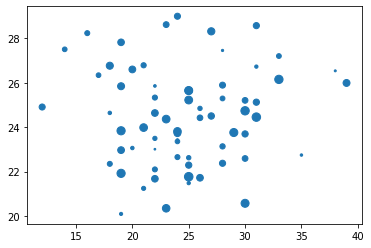

In [181]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count,
           urban_avg_fare,
           s=urban_driver_count)

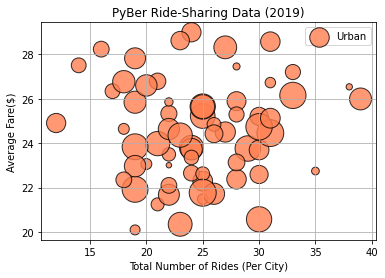

In [182]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count,
           urban_avg_fare,
           s=10*urban_driver_count, color="coral",
           edgecolor="black", linewidths=1,
           alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

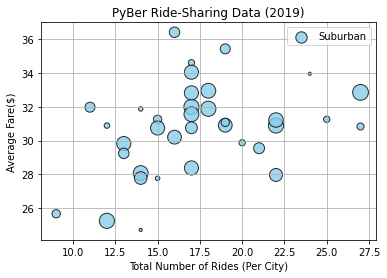

In [183]:
# Build the scatter plots for suburban cities.
plt.scatter(suburban_ride_count,
           suburban_avg_fare,
           s=10*suburban_driver_count, color="skyblue",
           edgecolor="black", linewidths=1,
           alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

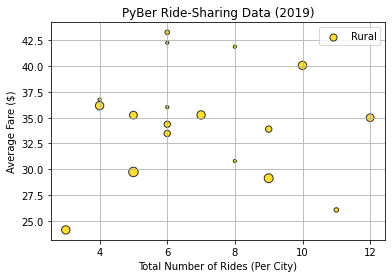

In [184]:
# Build the scatter plots for rural cities.
plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

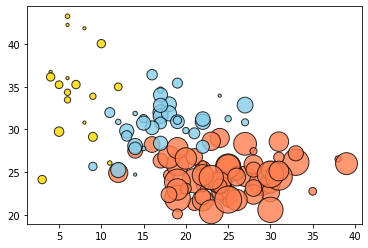

In [185]:
# Add the scatter charts for each type of city.
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

# Show the plot
plt.show()

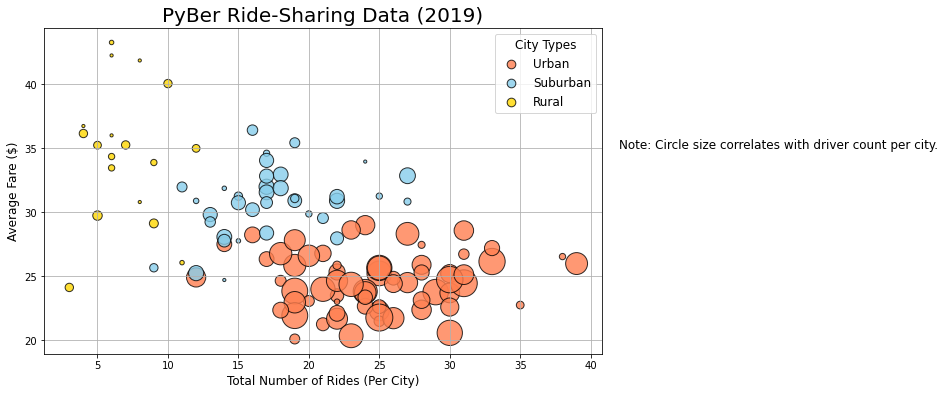

In [189]:
# Build the scatter charts for each city type.
plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Save the figure.
plt.savefig("analysis/Fig1.png")

# Show the plot
plt.show()